# ETL sobre Mercado Laboral de Data sobre csv de Kaggle

## Librerias e instalacones

In [1]:
!pip install missingno
# !pip install missingno --upgrade 
!pip install country_converter

In [2]:
# data
import pandas as pd
import numpy as np
import country_converter as coco

# visualizacion
import plotly.express as px
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.graph_objects as go
import plotly.figure_factory as ff

## 1. Identificar las fuentes de datos

## utilizamos el csv de Kaggle sobre sobre mercado laboral de Data

__Referencias:__
- work_year: Año en que se pagó el salario
- experience_level: Nivel de experiencia laboral:
    - EN = Inicial / Junior
    - MI = Medio / Intermedio
    - SE = Superior / Experto
    - EX = Ejecutivo / Director
- employnment_type: Rango de dedicación en el rol
    - PT = Parcial
    - FT = Completo
    - CT = Contratado
    - FL = Independiente
- job_title: Rol en el que se dempeño en el trabajo
- salary: Monto total del salario en bruto
- salary_currency: Moneda del salario pagado como un codígo IS 4217
- salary_in_usd: Salario en Dolares
- employee_residence: País de residencia principal del empleado
- remote_ratio: Cantidad de trabajo realizado de forma remota:
    - 0 = Menos del 20%
    - 50 = Parcialmente remoto
    - 100 = Totalmente remoto
- company_location: País de la oficina principal del contratante
- company_size: Numero promedio de personas que trabajaron en ese periódo
    - S = menos de 50 empleados
    - M = 50 a 250 empleados
    - L = más de 250 

## 2. Extraer los datos

In [7]:
df = pd.read_csv('../data/ds_salaries.csv')

## 3. Limpiar y Transformar los datos

In [4]:
df.head()

Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0               JP            S  
2                 GB            50               GB            M  
3                 HN             0               HN            S  
4                 US            50               US            L

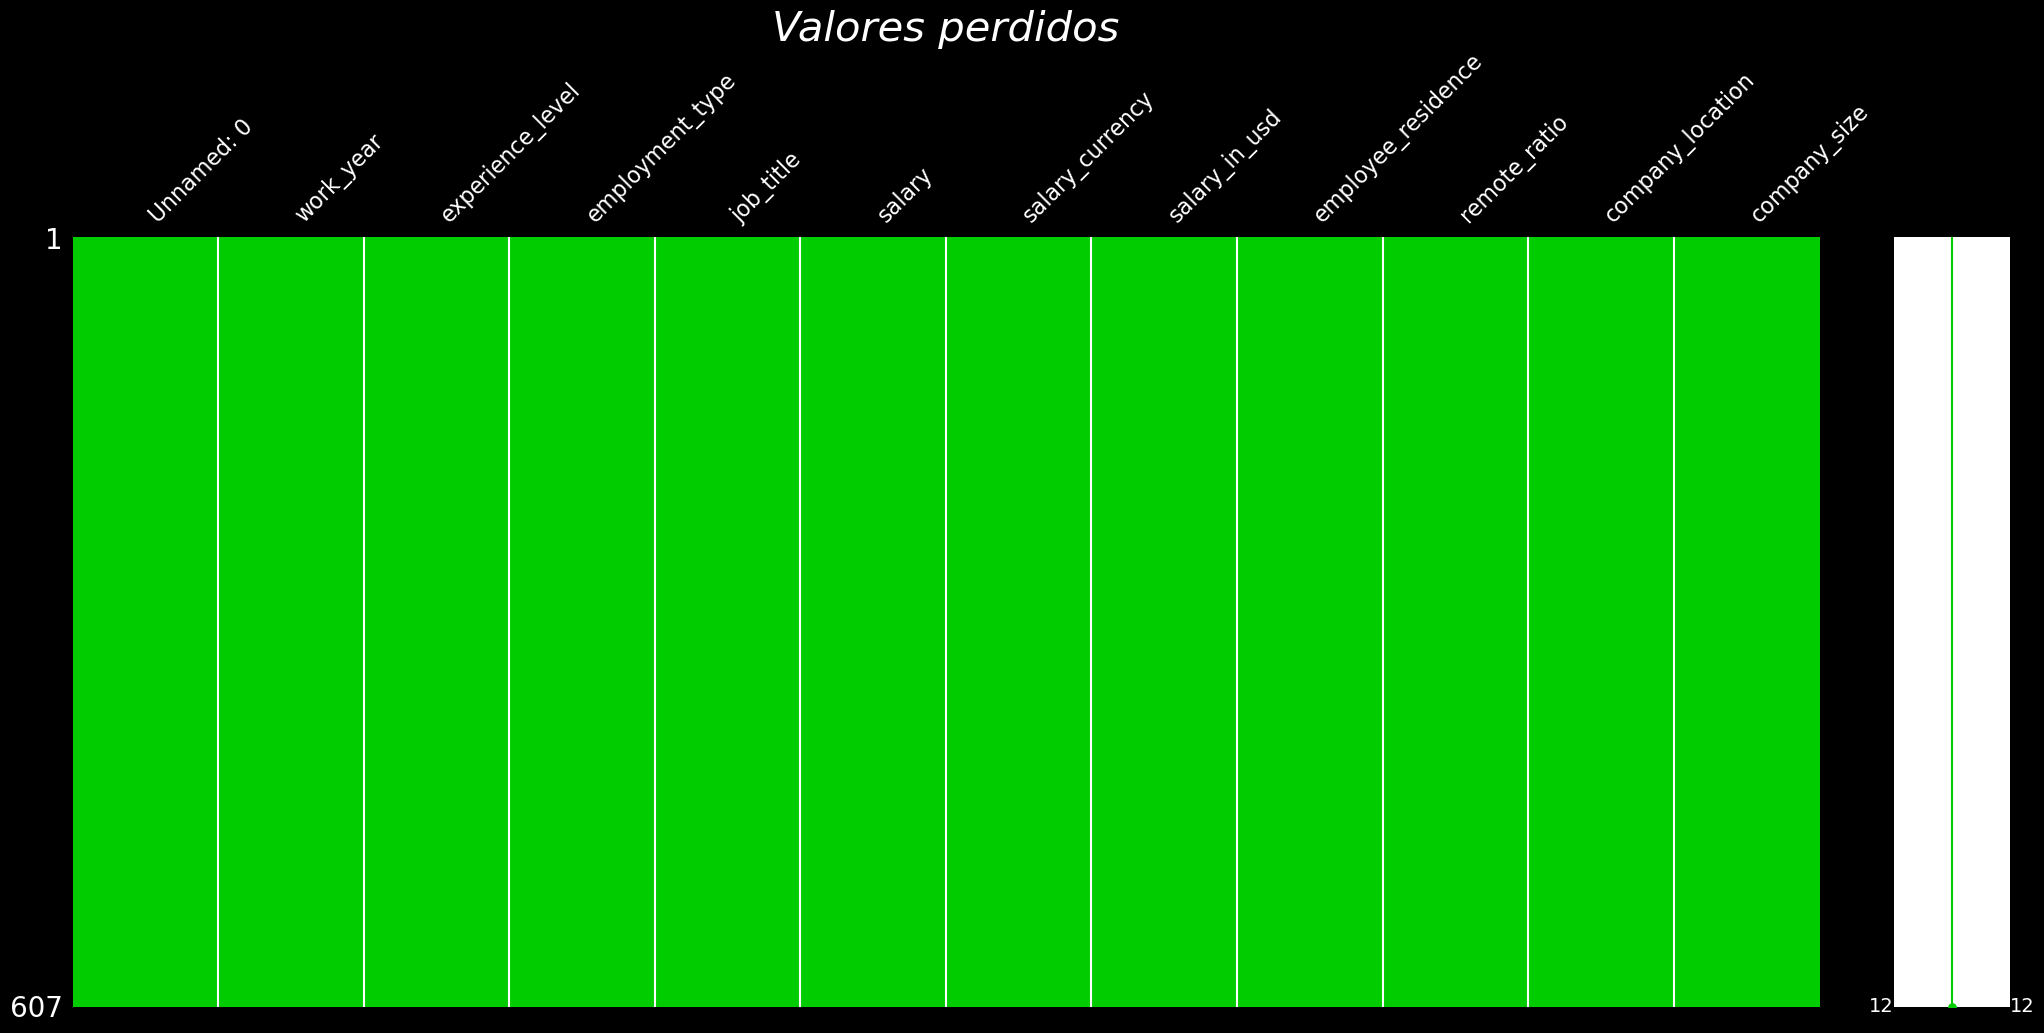

In [5]:
# Establecer el tema oscuro para matplotlib
plt.style.use('dark_background')

# Comprobamos graficamente si hay valores perdidos
msno.matrix(df, color=(0, 204/255, 0))
plt.title('Valores perdidos', fontsize=30, fontstyle='oblique')
plt.show()


No hay valores perdidos

### Trabajo por año

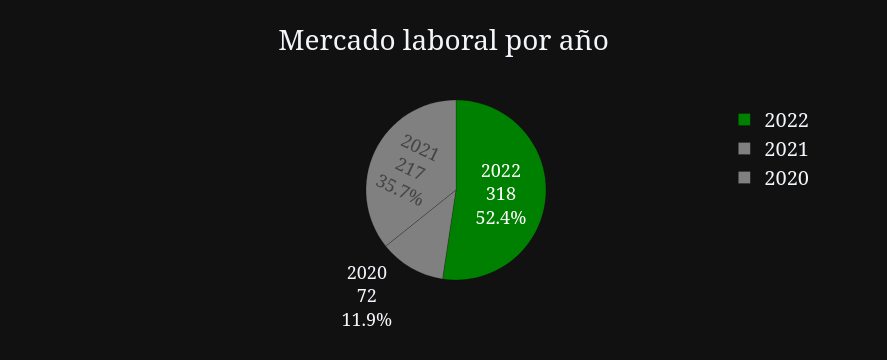

In [6]:
max_value = max(df['work_year'].value_counts())
wkyear = df['work_year'].value_counts()

fig = px.pie(values=wkyear.values, 
             names=wkyear.index, 
             color_discrete_map={str(value): 'gray' for value in wkyear.values},
             title= "Mercado laboral por año",
             template='plotly_dark')

fig.update_traces(textinfo='label+percent+value', textfont_size=18,
                  marker=dict(line=dict(color='#100000', width=0.2)))

fig.data[0].marker.line.width = 3
fig.data[0].marker.line.color='gray'
fig.update_traces(hoverinfo='label+percent',
                  marker=dict(colors=['green' if v == max_value else 'gray' for v in wkyear.values],
                              line=dict(color='#100000', width=0.2)))

fig.update_layout(font=dict(size=20,family="Franklin Gothic"), title_x=0.5)
fig.show()


### Niveles de experiencias

[ 4.28 14.5  35.09 46.13]


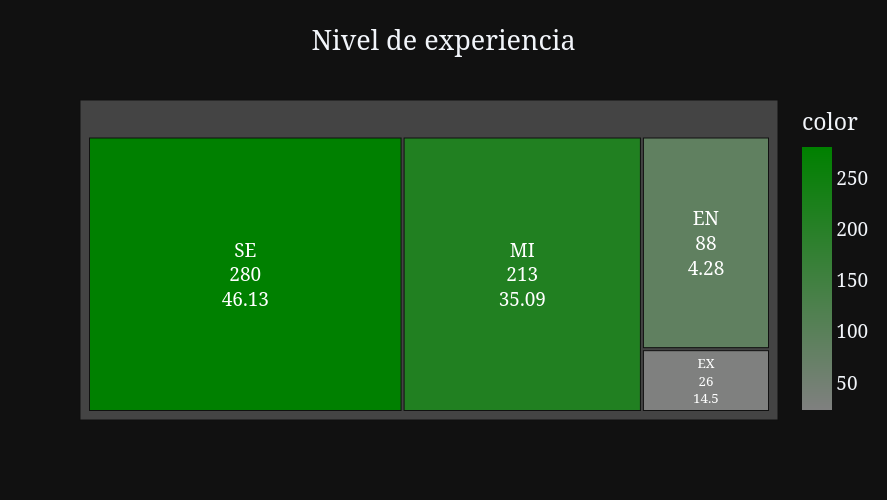

In [7]:
ex_level = df['experience_level'].value_counts()

fig = px.treemap(ex_level, 
                 path=[ex_level.index],
                 values=ex_level.values, 
                 title='Nivel de experiencia',
                 color=ex_level.values,
                 color_continuous_scale=['gray', 'green'],
                 color_continuous_midpoint=np.average(ex_level.values),
                 template='plotly_dark',
                 width=1000, height=500)

percents = np.sort(np.round((100*ex_level.values / sum(ex_level.values)).tolist(),2))
print(np.sort(percents))

fig.update_traces(
    textposition='middle center',
    texttemplate='%{label}<br>%{value}<br>%{customdata}',
    hovertemplate='<b>%{label}</b><br>'+'<b>%{value}</b> (%{customdata})',
    customdata=percents
)

fig.update_layout(
    font=dict(size=19,family="Franklin Gothic"),
    title_x=0.5
)

fig.show()

# hay que revisar bien los porcentajes en la grafica

### Tipo de Empleo

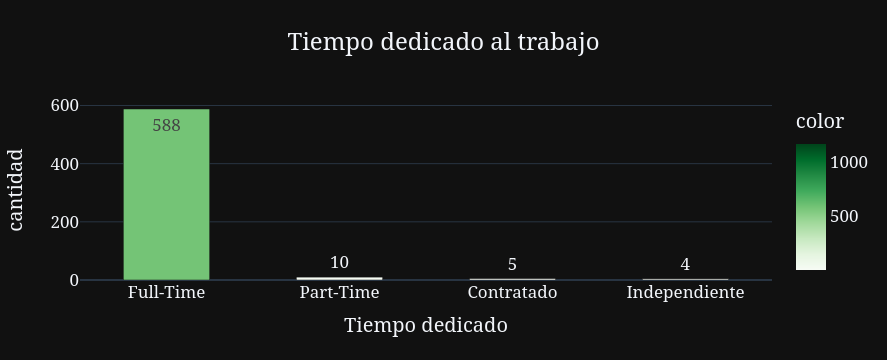

In [8]:
type_grouped = df['employment_type'].value_counts()
e_type = ['Full-Time','Part-Time','Contratado','Independiente']

fig = px.bar(
    x=e_type, 
    y=type_grouped.values, 
    color=type_grouped.values,
    color_continuous_scale=px.colors.sequential.Greens,
    color_continuous_midpoint=max(type_grouped.values),
    template='plotly_dark',
    text=type_grouped.values,
    title='Tiempo dedicado al trabajo'
)

fig.update_layout(
    xaxis_title="Tiempo dedicado",
    yaxis_title="cantidad",
    font=dict(size=17, family="Franklin Gothic"),
    title_x=0.5
)

fig.update_traces(width=0.5)

fig.show()


### Especialidades de trabajo

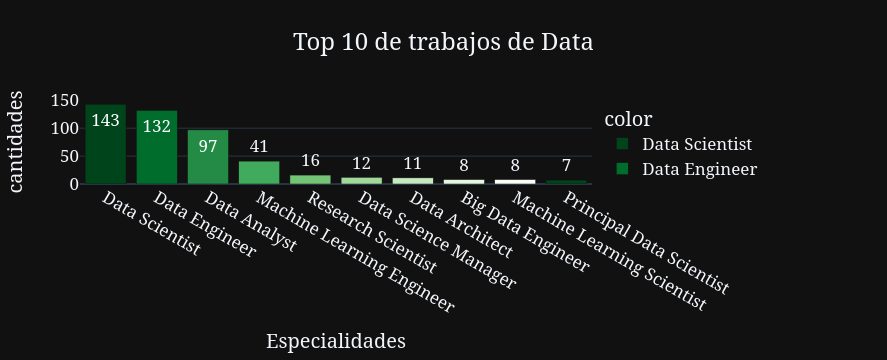

In [9]:
top10_job_title = df['job_title'].value_counts()[:10]

fig = px.bar(y=top10_job_title.values, 
             x=top10_job_title.index, 
             color = top10_job_title.index,
             color_discrete_sequence=px.colors.sequential.Greens_r,
             text=top10_job_title.values,
             title= 'Top 10 de trabajos de Data',
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Especialidades",
    yaxis_title="cantidades",
    font = dict(size=17,family="Franklin Gothic"), title_x=0.5)
fig.show()

### Salario en Dolares

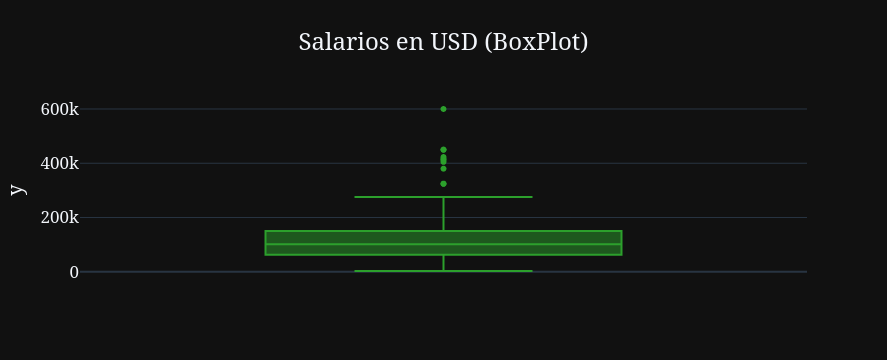

In [10]:


hist_data = [df['salary_in_usd']]
group_labels = ['salary_in_usd']

fig1 = px.box(y=df['salary_in_usd'], color_discrete_sequence=['#2ca02c'], template='plotly_dark', 
              title='Salarios en USD (BoxPlot)')
fig1.update_layout(font=dict(size=17, family="Franklin Gothic"), title_x=0.5)
fig1.show()

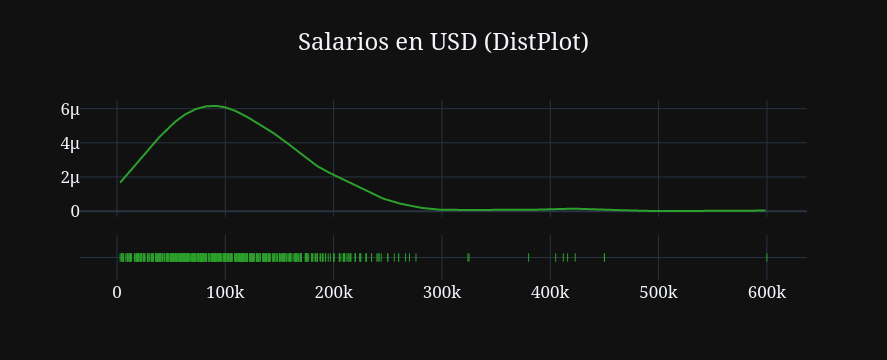

In [11]:
fig2 = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=['#2ca02c'])
fig2.layout.template = 'plotly_dark'
fig2.update_layout(legend={'traceorder':'reversed'}) # Define una leyenda vacía para la figura de distribución

fig2.update_layout(title='Salarios en USD (DistPlot)', font=dict(size=17, family="Franklin Gothic"), 
                   title_x=0.5, showlegend=False) 

fig2.show()

### Residencia de empleo y Localidad de la Empresa

In [12]:
converted_country = coco.convert(names=df['employee_residence'], to="ISO3")
df['employee_residence'] = converted_country

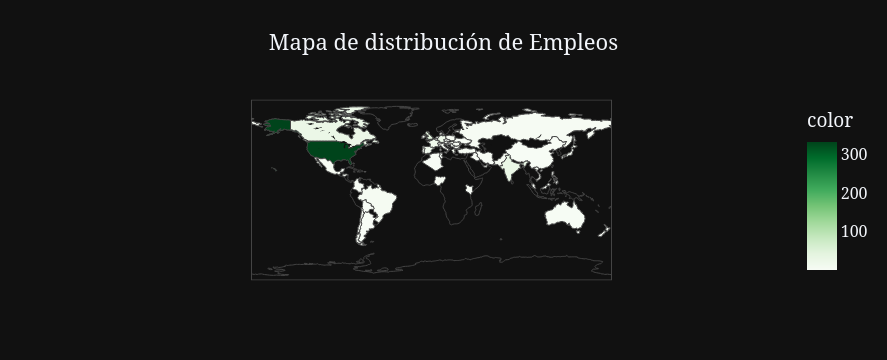

In [13]:


residence = df['employee_residence'].value_counts()

fig = px.choropleth(locations=residence.index,
                    color=residence.values,
                    color_continuous_scale=px.colors.sequential.Greens,
                    template='plotly_dark',
                    title='Mapa de distribución de Empleos',
                    width=1000)

fig.update_layout(font=dict(size=16, family="Franklin Gothic"), title_x=0.5)

# No puedo eliminar la barra de colores y leyenda lateral

fig.show()


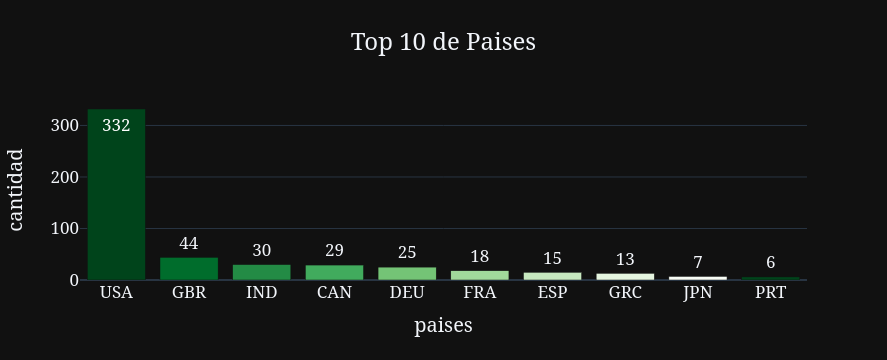

In [14]:
top10_employee_location = residence[:10]
fig = px.bar(y=top10_employee_location.values, 
             x=top10_employee_location.index, 
             color = top10_employee_location.index,
             color_discrete_sequence=px.colors.sequential.Greens_r,
             text=top10_employee_location.values,
             title= 'Top 10 de Paises',
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="paises",
    yaxis_title="cantidad",
    font = dict(size=17,family="Franklin Gothic"),
title_x=.5,
showlegend=False)

fig.show()

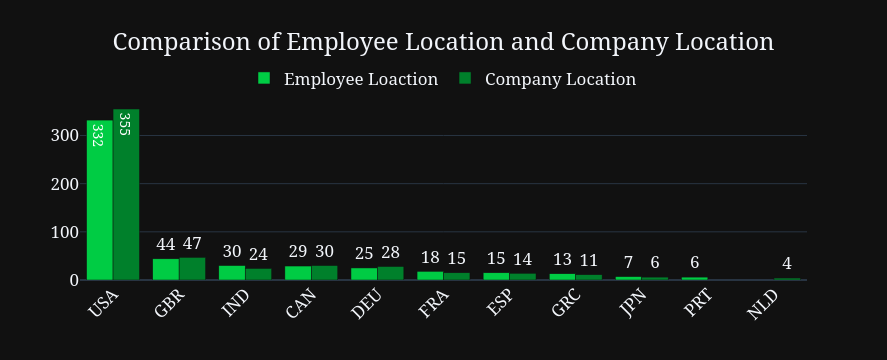

In [15]:


converted_country = coco.convert(names=df['company_location'], to="ISO3")
df['company_location'] = converted_country
c_location = df['company_location'].value_counts()
top_10_company_location = c_location[:10]

fig = go.Figure(data=[
    go.Bar(name='Employee Loaction', 
           x=top10_employee_location.index, y=top10_employee_location.values,
           text=top10_employee_location.values, marker_color='#00cc44'),
    go.Bar(name='Company Location', x=top_10_company_location.index, 
           y=top_10_company_location.values,text=top_10_company_location.values, marker_color='#00802b')
])

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Comparison of Employee Location and Company Location', 
                  title_x=0.5, template='plotly_dark',
                  font=dict(size=17,family="Franklin Gothic"),
                  legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='center', x=0.5))

fig.show()


### Trabajo remoto

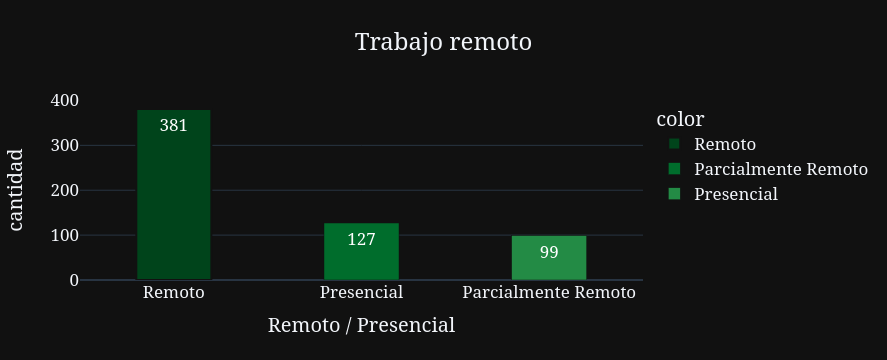

<Figure size 2000x500 with 0 Axes>

In [16]:
remote_type = ['Remoto','Parcialmente Remoto','Presencial']

plt.figure(figsize=(20,5))
fig = px.bar(x = ['Remoto','Presencial','Parcialmente Remoto'], 
       y = df['remote_ratio'].value_counts().values,
       color = remote_type,
       color_discrete_sequence=px.colors.sequential.Greens_r,
       text=df['remote_ratio'].value_counts().values,
       title = 'Trabajo remoto',
       template='plotly_dark')

fig.update_traces(width=0.4)

fig.data[0].marker.line.width = 2

fig.update_layout(
    xaxis_title="Remoto / Presencial",
    yaxis_title="cantidad",
    font = dict(size=17,family="Franklin Gothic"),
title_x=.5)

fig.show()

### Tamaño de compañia

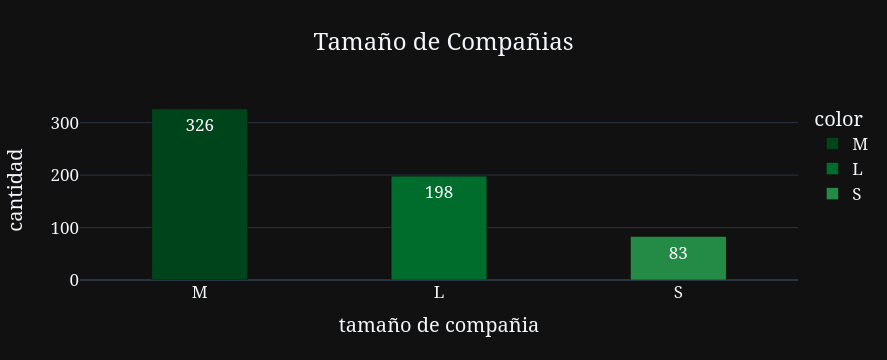

In [17]:
grouped_size = df['company_size'].value_counts()

fig = px.bar(y=grouped_size.values, 
             x=grouped_size.index, 
             color = grouped_size.index,
             color_discrete_sequence=px.colors.sequential.Greens_r,
             text=grouped_size.values,
             title= 'Tamaño de Compañias',
             template= 'plotly_dark')

fig.update_traces(width=0.4)
fig.update_layout(
    xaxis_title="tamaño de compañia",
    yaxis_title="cantidad",
    font = dict(size=17,family="Franklin Gothic"),
title_x=0.5)
fig.show()

## 4. Cargar los datos

## 5. Verificar la integridad de los datos

## 6. Automatizar el proceso

## 7. Mantener el proceso (test y actualizaciones)